In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [6]:
df= pd.read_csv("JobMarketData.csv")
df.head()

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,PG/Phd,Full Time,1200000-2100000,1200000,2100000,3
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000,8


In [7]:
df.shape

(388, 12)

In [8]:
df.columns

Index(['Role', 'Companies', 'Location', 'Experience', 'Skills', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary', 'Min Experience'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  388 non-null    object
 1   Companies             388 non-null    object
 2   Location              388 non-null    object
 3   Experience            388 non-null    object
 4   Skills                388 non-null    object
 5   Company Size          373 non-null    object
 6   Eligibility Criteria  388 non-null    object
 7   Enrollment Type       388 non-null    object
 8   Salary                326 non-null    object
 9   Min Salary            388 non-null    object
 10  Max Salary            388 non-null    object
 11  Min Experience        388 non-null    object
dtypes: object(12)
memory usage: 36.5+ KB


In [10]:
df.isnull().sum()

Role                     0
Companies                0
Location                 0
Experience               0
Skills                   0
Company Size            15
Eligibility Criteria     0
Enrollment Type          0
Salary                  62
Min Salary               0
Max Salary               0
Min Experience           0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
ordinal_features = ['Company Size', 'Salary','Experience'] 
for feature in ordinal_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

In [14]:
df.isnull().sum()

Role                    0
Companies               0
Location                0
Experience              0
Skills                  0
Company Size            0
Eligibility Criteria    0
Enrollment Type         0
Salary                  0
Min Salary              0
Max Salary              0
Min Experience          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  313 non-null    object
 1   Companies             313 non-null    object
 2   Location              313 non-null    object
 3   Experience            313 non-null    int32 
 4   Skills                313 non-null    object
 5   Company Size          313 non-null    int32 
 6   Eligibility Criteria  313 non-null    object
 7   Enrollment Type       313 non-null    object
 8   Salary                313 non-null    int32 
 9   Min Salary            313 non-null    object
 10  Max Salary            313 non-null    object
 11  Min Experience        313 non-null    object
dtypes: int32(3), object(9)
memory usage: 28.1+ KB


In [16]:
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce').fillna(0).astype(int)
df["Max Salary"] = pd.to_numeric(df["Max Salary"], errors="coerce").fillna(0).astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  313 non-null    object
 1   Companies             313 non-null    object
 2   Location              313 non-null    object
 3   Experience            313 non-null    int32 
 4   Skills                313 non-null    object
 5   Company Size          313 non-null    int32 
 6   Eligibility Criteria  313 non-null    object
 7   Enrollment Type       313 non-null    object
 8   Salary                313 non-null    int32 
 9   Min Salary            313 non-null    int32 
 10  Max Salary            313 non-null    int32 
 11  Min Experience        313 non-null    object
dtypes: int32(5), object(7)
memory usage: 25.7+ KB


In [18]:
df=df.drop(["Min Experience"],axis=1)

In [19]:
df["Role"].unique()

array(['Data Scientist', 'Machine Learning Engineer', 'Data Engineer',
       'Applied Scientist (Machine Learning)', 'For Data Scientist',
       'Elastic Path Solutions Application Developer',
       'Machine Learning Data Science Practitioner',
       'SAP BusinessObjects Data Services Application Developer',
       'Artificial Intelligence Scientist', 'Data Analyst',
       'Trainee-freshers-machine Learning-ai-data Scientist',
       'ML/AI Intern', 'Python Developer', 'Applied Scientist - Intern',
       'Software Engineer', 'Senior Decision Scientist',
       'AWS Engineer(AWS glue)', 'Machine Learning/NLP Expert',
       'Cloud Migration Consultant', 'COE Lead- Artificial Intelligence',
       'Technical Architect', 'Artificial Intelligence Architect',
       'Test Specialist:Middleware', 'Teradata Administrator',
       'Machine Learning Architect', 'Engineer,Product Applications',
       'Tibco Spotfire Developer', 'Technical Project Lead', 'Knime',
       'Teradata, Informat

In [20]:
print(df['Role'].value_counts())

Role
Data Scientist                                             146
Machine Learning Engineer                                   70
Data Analyst                                                40
Data Engineer                                               11
Software Engineer                                            8
Artificial Intelligence Architect                            4
Python Developer                                             3
Machine Learning Architect                                   3
Teradata Administrator                                       1
Engineer,Product Applications                                1
Tibco Spotfire Developer                                     1
Knime                                                        1
Technical Project Lead                                       1
Teradata, Informatica Developer                              1
Customer Success Manager                                     1
Solution Engineer                                 

In [21]:
data_scientists = df[df["Role"] == "Data Scientist"]
data_scientists.head()

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary
0,Data Scientist,2Coms,New Delhi,29,DataModeling\nEnterpriseApplications\nAnalytic...,105,B.Tech,Freelance,5,1000000,2000000
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",78,Machine Learning Code DataScience R Data Model...,8,Phd,Full Time,33,160000,185000
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,90,Team Handling\nSegmentation\nOperations Resear...,39,Phd,Full Time,91,5000000,1700000
5,Data Scientist,3D India Staffing Research & Consulting Pvt Ltd,"Gurgaon, Gurugram",46,R\nLending\nSAS\nData Scientist\nHadoop\nSpark...,39,PG,Full Time,17,1300000,1700000
6,Data Scientist,3D India Staffing Research Consulting Pvt Ltd,Gurgaon,46,Quantitative Analysis\nProduct Management\nLen...,39,PG,Full Time,26,1500000,1900000


In [22]:
data_scientist=data_scientists['Role'].value_counts().sort_values(ascending=False)
data_scientist.head()

Role
Data Scientist    146
Name: count, dtype: int64

In [23]:
data_scientists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  146 non-null    object
 1   Companies             146 non-null    object
 2   Location              146 non-null    object
 3   Experience            146 non-null    int32 
 4   Skills                146 non-null    object
 5   Company Size          146 non-null    int32 
 6   Eligibility Criteria  146 non-null    object
 7   Enrollment Type       146 non-null    object
 8   Salary                146 non-null    int32 
 9   Min Salary            146 non-null    int32 
 10  Max Salary            146 non-null    int32 
dtypes: int32(5), object(6)
memory usage: 10.8+ KB


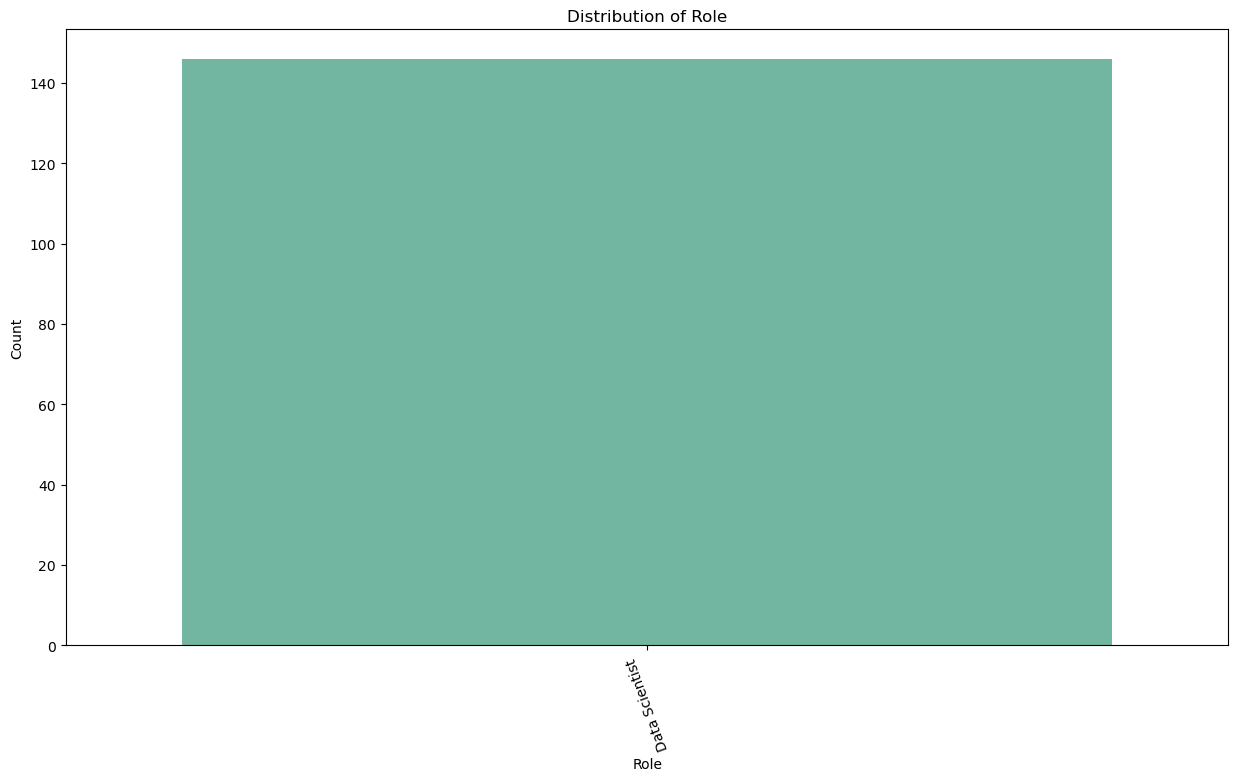

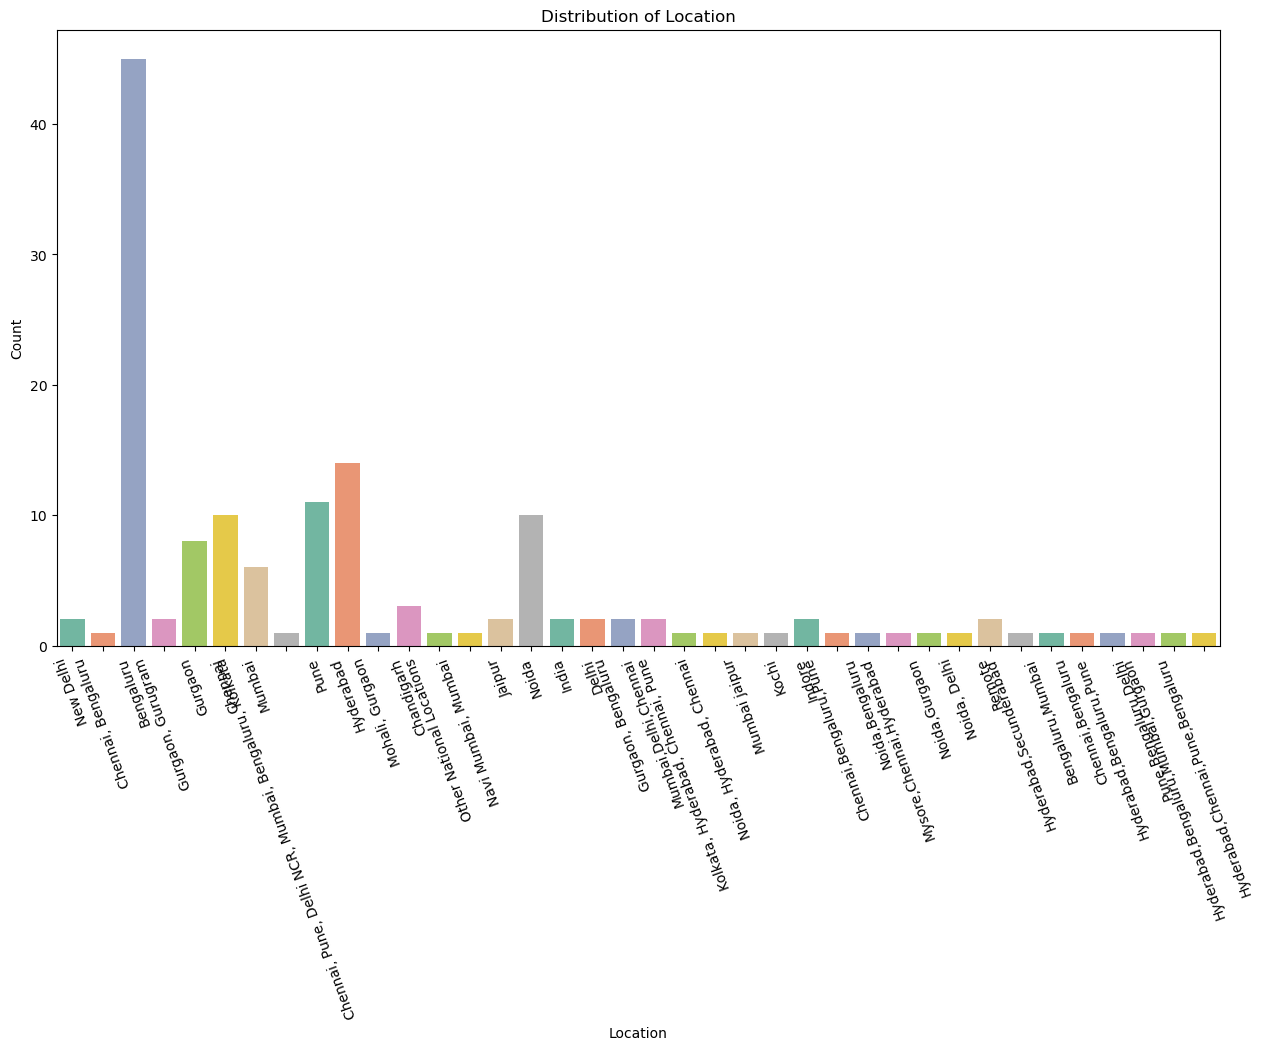

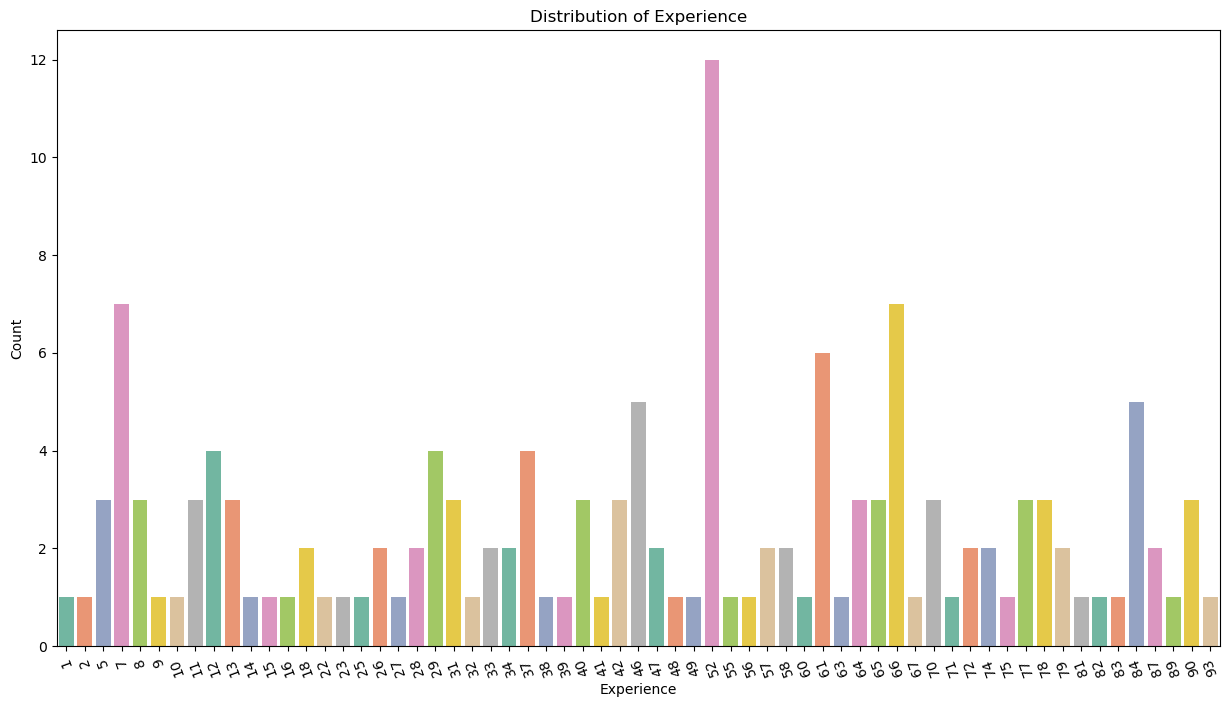

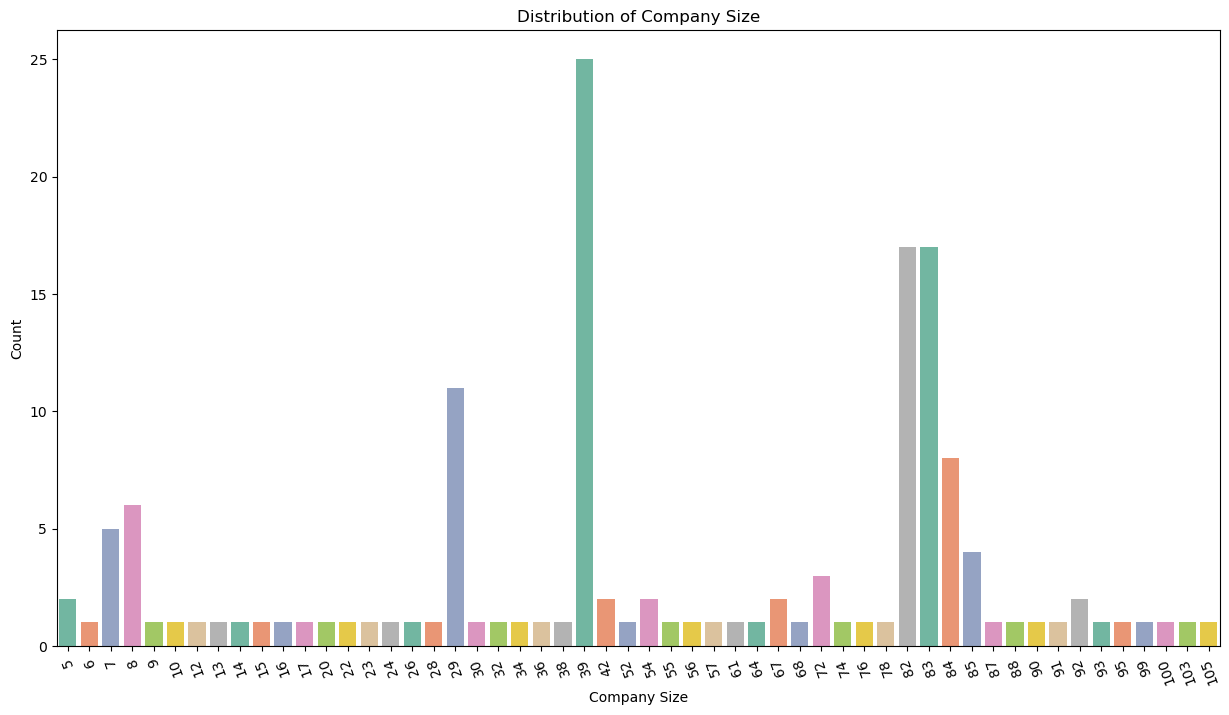

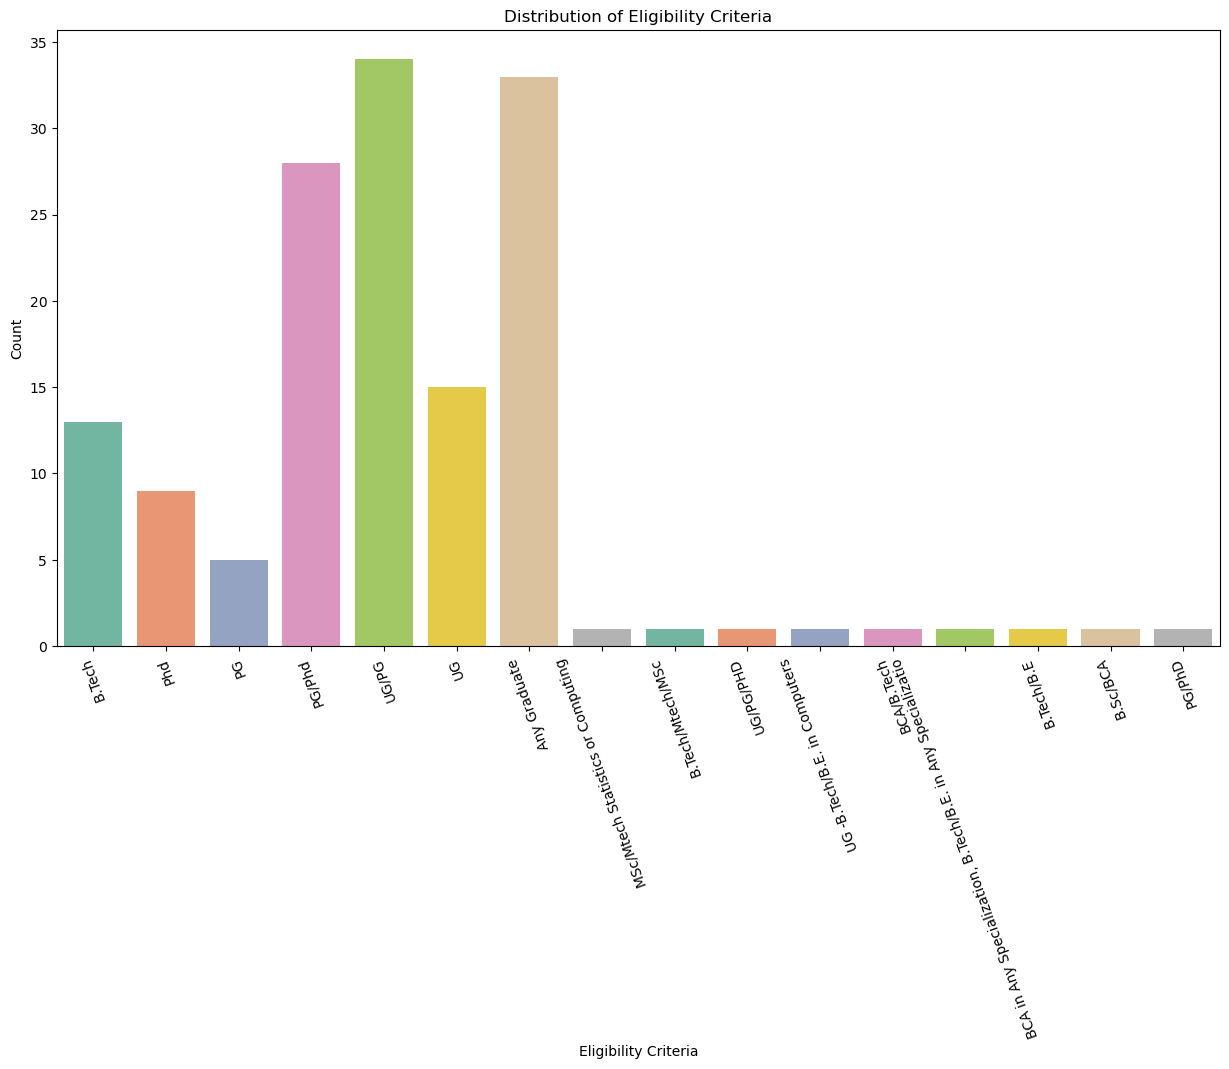

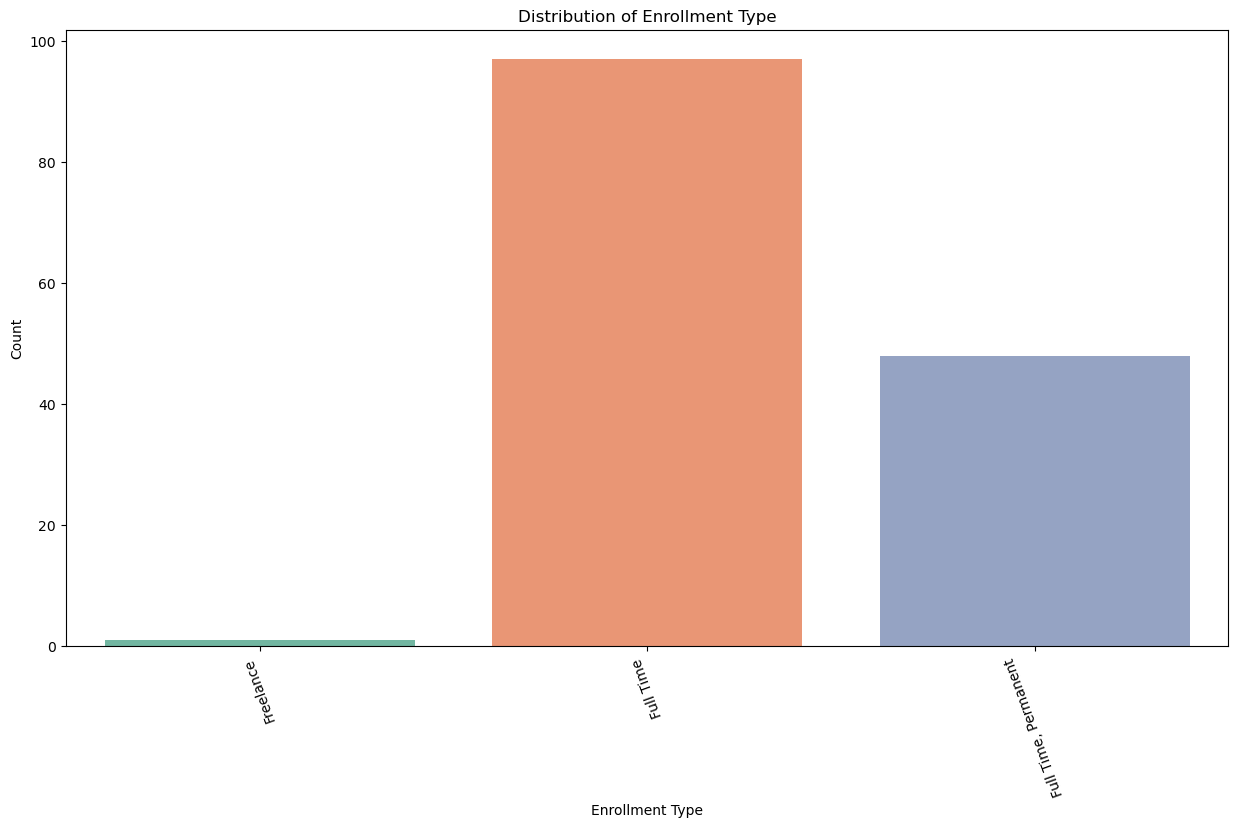

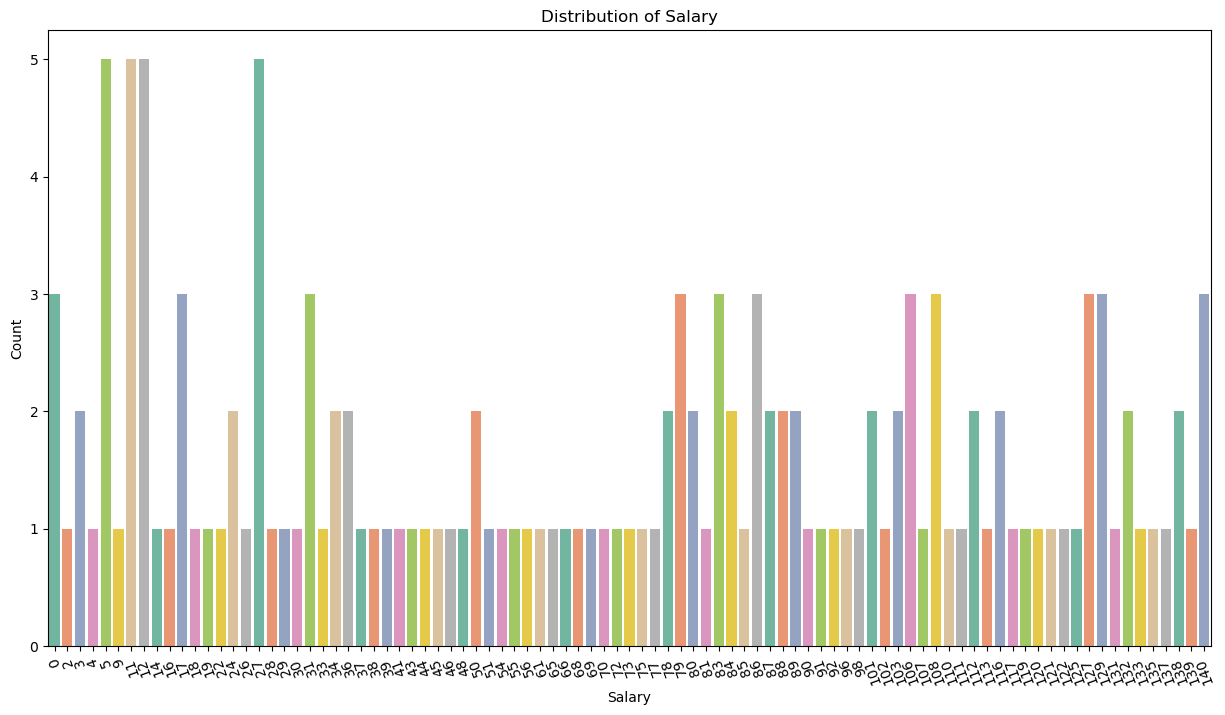

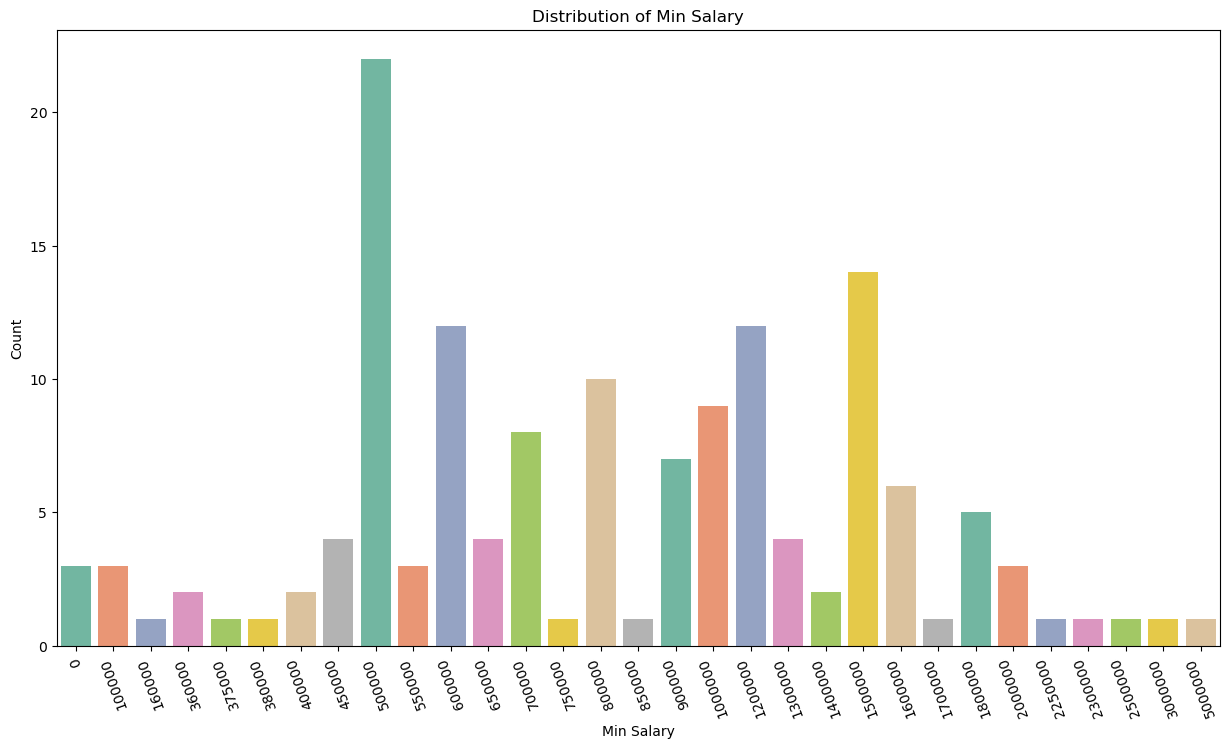

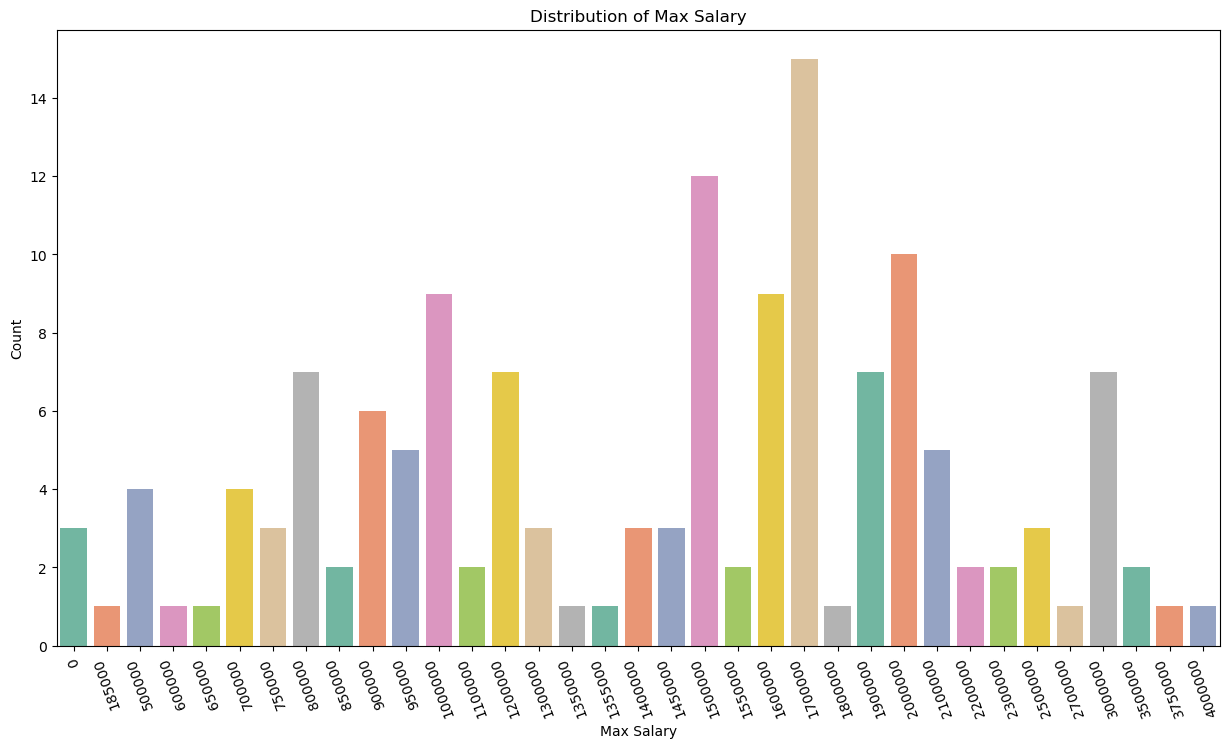

In [24]:
categorical_features =['Role', 'Location', 'Experience', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary']
for feature in categorical_features:
    plt.figure(figsize=(15, 8))
    sns.countplot(data= data_scientists, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
   # plt.xticks(rotation=45)
    plt.xticks(rotation = 110)
    plt.show()

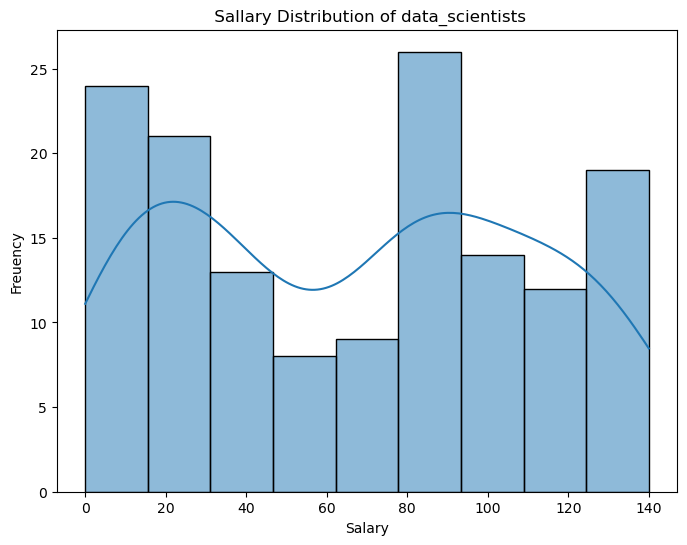

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=data_scientists, x= 'Salary' , kde= True)
plt.title(f' Sallary Distribution of data_scientists')
plt.xlabel("Salary")
plt.ylabel('Freuency')
plt.show()

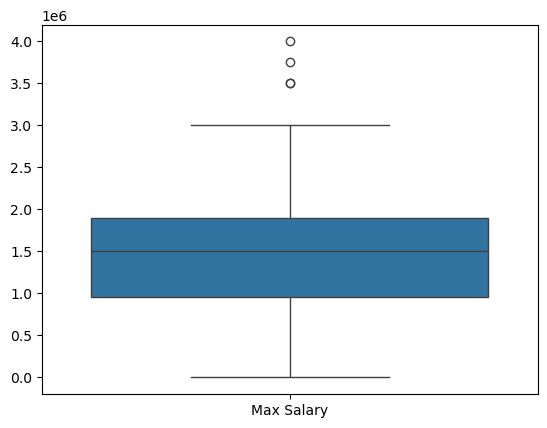

In [26]:
sns.boxplot(data=data_scientists[["Max Salary"]])
plt.show()

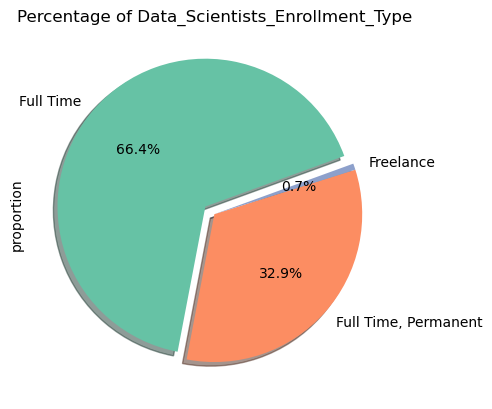

In [27]:
data_scientists_Enrollment_type = data_scientists['Enrollment Type'].value_counts(normalize=True)*100
data_scientists_Enrollment_type.plot.pie(autopct='%1.1f%%', startangle=20, colors=sns.color_palette('Set2'), explode=(0.08,0,0 ) , shadow=True )
plt.title('Percentage of Data_Scientists_Enrollment_Type')
plt.show()

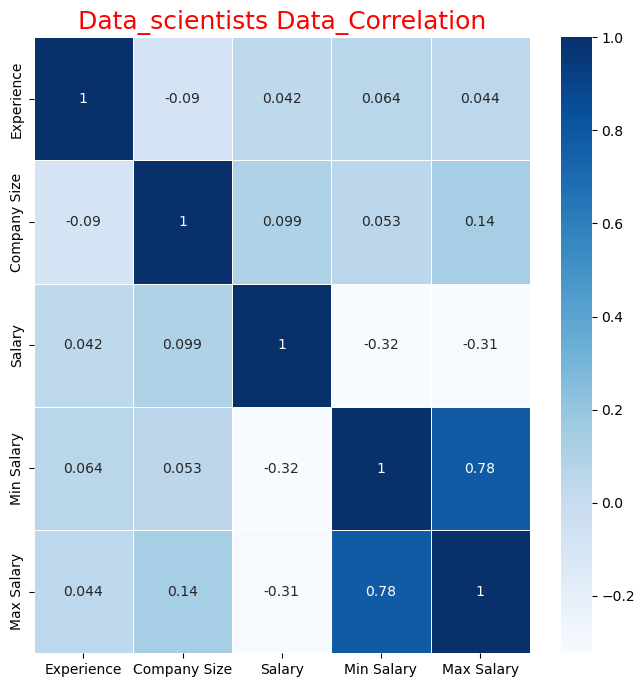

In [28]:
numerical_columns = data_scientists.select_dtypes(include=['number']).columns
corr = data_scientists[numerical_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap="Blues", annot=True, linewidth=0.5)
plt.title("Data_scientists Data_Correlation",color="Red",size=18)
plt.show()

In [29]:
# WORD_COLUD
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [30]:
df["Role"].unique()

array(['Data Scientist', 'Machine Learning Engineer', 'Data Engineer',
       'Applied Scientist (Machine Learning)', 'For Data Scientist',
       'Elastic Path Solutions Application Developer',
       'Machine Learning Data Science Practitioner',
       'SAP BusinessObjects Data Services Application Developer',
       'Artificial Intelligence Scientist', 'Data Analyst',
       'Trainee-freshers-machine Learning-ai-data Scientist',
       'ML/AI Intern', 'Python Developer', 'Applied Scientist - Intern',
       'Software Engineer', 'Senior Decision Scientist',
       'AWS Engineer(AWS glue)', 'Machine Learning/NLP Expert',
       'Cloud Migration Consultant', 'COE Lead- Artificial Intelligence',
       'Technical Architect', 'Artificial Intelligence Architect',
       'Test Specialist:Middleware', 'Teradata Administrator',
       'Machine Learning Architect', 'Engineer,Product Applications',
       'Tibco Spotfire Developer', 'Technical Project Lead', 'Knime',
       'Teradata, Informat

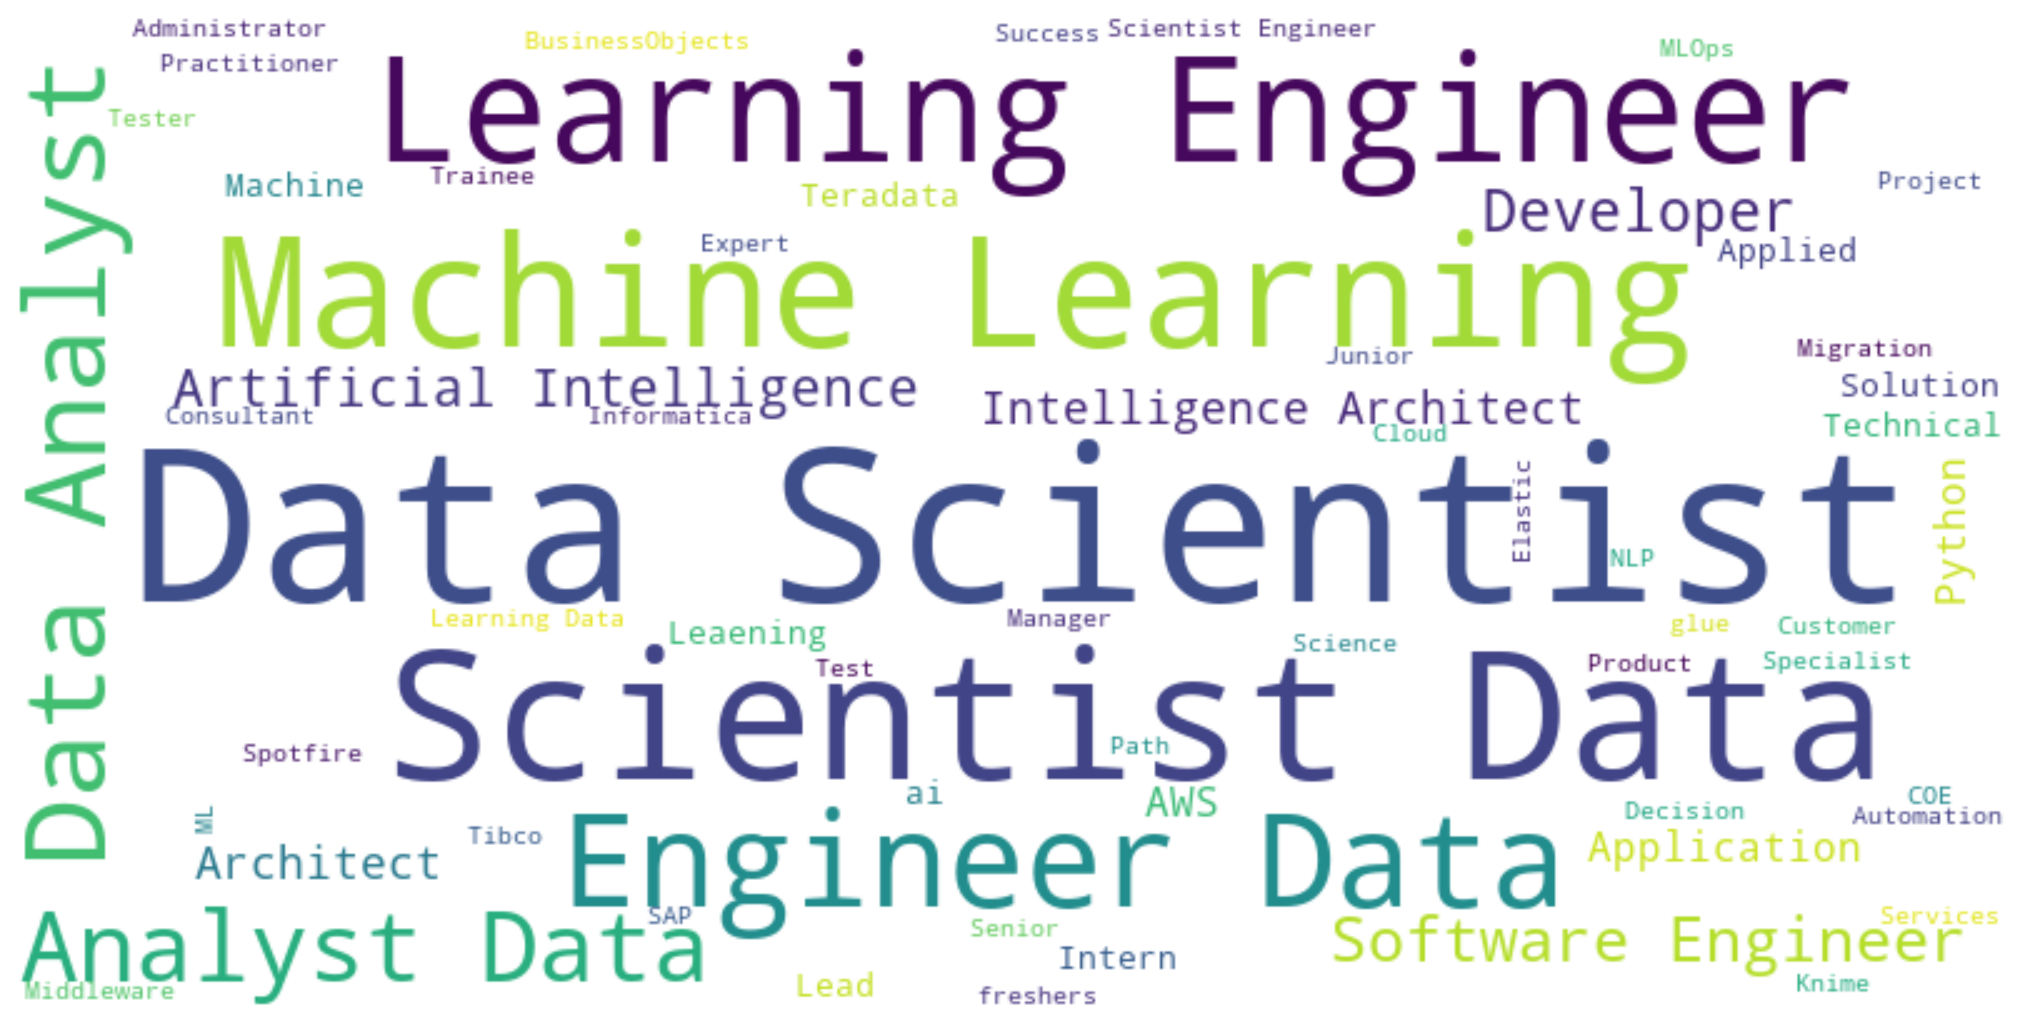

In [87]:
from wordcloud import WordCloud, STOPWORDS
# Extract the "Role" column
roles = df['Role']
# Combine all roles into a single string
text = ' '.join(roles)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords = STOPWORDS,min_font_size = 10).generate(text)
# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.tight_layout(pad = 0)
plt.show()

<Figure size 640x480 with 0 Axes>

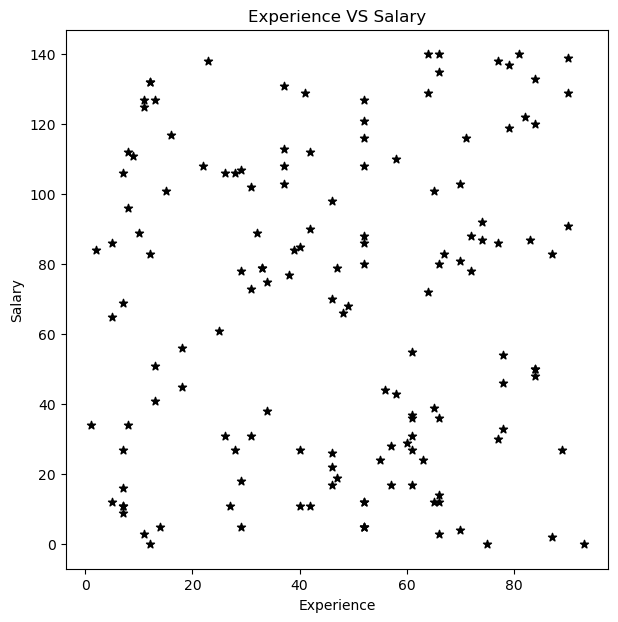

In [32]:
# Linear Regression
plt.figure()
plt.figure(figsize=(7,7))
plt.scatter(data_scientists["Experience"],data_scientists["Salary"],color="k",marker="*")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience VS Salary")
plt.show()

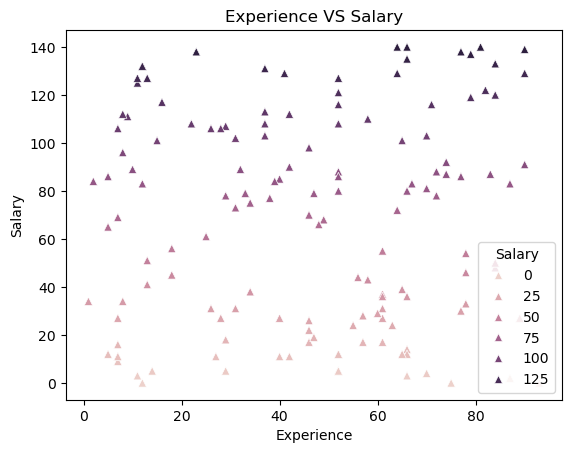

In [33]:
sns.scatterplot(x="Experience",y="Salary",data=data_scientists,marker="^",hue="Salary").set(title="Experience VS Salary")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = data_scientists["Experience"].values.reshape(-1,1)
x

array([[29],
       [78],
       [90],
       [46],
       [46],
       [47],
       [72],
       [71],
       [16],
       [90],
       [90],
       [87],
       [22],
       [46],
       [61],
       [79],
       [79],
       [31],
       [52],
       [61],
       [37],
       [66],
       [52],
       [13],
       [52],
       [ 8],
       [12],
       [12],
       [66],
       [37],
       [37],
       [70],
       [57],
       [58],
       [61],
       [11],
       [ 5],
       [13],
       [52],
       [87],
       [52],
       [57],
       [66],
       [84],
       [23],
       [52],
       [31],
       [ 2],
       [66],
       [52],
       [65],
       [37],
       [18],
       [84],
       [42],
       [41],
       [77],
       [10],
       [61],
       [29],
       [61],
       [42],
       [ 7],
       [63],
       [27],
       [77],
       [70],
       [74],
       [66],
       [49],
       [74],
       [12],
       [61],
       [13],
       [18],
       [64],
       [64],

In [36]:
y=data_scientists["Salary"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [38]:
x_train.shape

(116, 1)

In [39]:
x_test.shape

(30, 1)

In [40]:
x_train.ndim

2

In [41]:
y_train.shape

(116,)

In [42]:
y_test.shape

(30,)

In [43]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
reg.score(x_train,y_train)

0.0058656351192629685

In [45]:
print(reg.coef_)

[0.13783295]


In [46]:
print(reg.intercept_)

61.069526868526474


In [47]:
y_pred=reg.predict(x)
y_pred

array([65.06668255, 71.82049731, 73.47449276, 67.40984277, 67.40984277,
       67.54767573, 70.99349958, 70.85566663, 63.27485414, 73.47449276,
       73.47449276, 73.0609939 , 64.10185187, 67.40984277, 69.47733709,
       71.95833027, 71.95833027, 65.34234845, 68.2368405 , 69.47733709,
       66.16934618, 70.16650186, 68.2368405 , 62.86135528, 68.2368405 ,
       62.1721905 , 62.72352232, 62.72352232, 70.16650186, 66.16934618,
       66.16934618, 70.71783368, 68.92600527, 69.06383822, 69.47733709,
       62.58568937, 61.75869164, 62.86135528, 68.2368405 , 73.0609939 ,
       68.2368405 , 68.92600527, 70.16650186, 72.64749504, 64.23968482,
       68.2368405 , 65.34234845, 61.34519278, 70.16650186, 68.2368405 ,
       70.0286689 , 66.16934618, 63.55052005, 72.64749504, 66.85851095,
       66.720678  , 71.68266436, 62.44785641, 69.47733709, 65.06668255,
       69.47733709, 66.85851095, 62.03435755, 69.753003  , 64.79101664,
       71.68266436, 70.71783368, 71.26916549, 70.16650186, 67.82

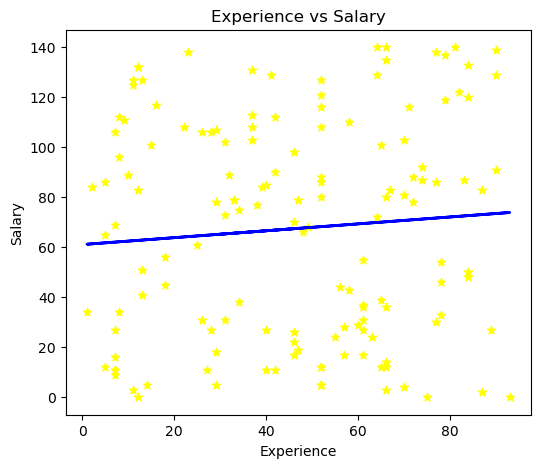

In [48]:
plt.figure(figsize=(6,5))
plt.scatter(data_scientists["Experience"],data_scientists["Salary"],color="yellow",marker="*")
plt.plot(data_scientists["Experience"],y_pred,color="blue",linewidth=2)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

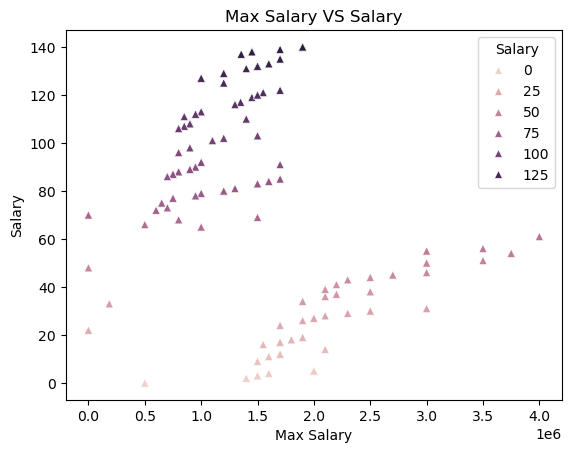

In [49]:
#Standard_Scaler
sns.scatterplot(x="Max Salary",y="Salary",data=data_scientists,marker="^",hue="Salary").set(title="Max Salary VS Salary")
plt.show()

In [50]:
x = data_scientists["Max Salary"].values.reshape(-1,1)
x

array([[2000000],
       [ 185000],
       [1700000],
       [1700000],
       [1900000],
       [1900000],
       [ 800000],
       [1300000],
       [1350000],
       [1700000],
       [1200000],
       [1500000],
       [ 900000],
       [ 900000],
       [2200000],
       [1355000],
       [1450000],
       [ 700000],
       [1700000],
       [1700000],
       [1000000],
       [1200000],
       [ 900000],
       [1000000],
       [1300000],
       [ 800000],
       [1500000],
       [1500000],
       [2100000],
       [ 900000],
       [1400000],
       [1500000],
       [2100000],
       [2300000],
       [2100000],
       [1200000],
       [1700000],
       [2200000],
       [1700000],
       [1400000],
       [1550000],
       [1700000],
       [2100000],
       [      0],
       [1450000],
       [ 800000],
       [1200000],
       [1600000],
       [1700000],
       [1200000],
       [1100000],
       [1500000],
       [2700000],
       [1600000],
       [1600000],
       [12

In [51]:
y = data_scientists["Min Salary"].values.reshape(-1,1)
y

array([[1000000],
       [ 160000],
       [5000000],
       [1300000],
       [1500000],
       [1400000],
       [ 500000],
       [ 700000],
       [ 700000],
       [ 900000],
       [ 800000],
       [ 500000],
       [ 600000],
       [ 550000],
       [1600000],
       [ 900000],
       [ 700000],
       [ 400000],
       [1200000],
       [1300000],
       [ 700000],
       [ 500000],
       [ 600000],
       [ 800000],
       [ 700000],
       [ 550000],
       [ 800000],
       [ 800000],
       [1200000],
       [ 600000],
       [ 800000],
       [ 600000],
       [1500000],
       [1800000],
       [1600000],
       [ 750000],
       [1200000],
       [1800000],
       [1200000],
       [1000000],
       [ 700000],
       [1300000],
       [1600000],
       [      0],
       [ 900000],
       [ 500000],
       [ 600000],
       [ 500000],
       [1200000],
       [ 500000],
       [ 600000],
       [ 600000],
       [1800000],
       [ 800000],
       [1200000],
       [ 8

In [52]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_data = sc.fit_transform(x)
x_data

array([[ 0.65579758],
       [-1.83531195],
       [ 0.24404394],
       [ 0.24404394],
       [ 0.51854637],
       [ 0.51854637],
       [-0.99121699],
       [-0.30496092],
       [-0.23633531],
       [ 0.24404394],
       [-0.44221213],
       [-0.03045849],
       [-0.85396577],
       [-0.85396577],
       [ 0.93030001],
       [-0.22947275],
       [-0.0990841 ],
       [-1.1284682 ],
       [ 0.24404394],
       [ 0.24404394],
       [-0.71671456],
       [-0.44221213],
       [-0.85396577],
       [-0.71671456],
       [-0.30496092],
       [-0.99121699],
       [-0.03045849],
       [-0.03045849],
       [ 0.7930488 ],
       [-0.85396577],
       [-0.1677097 ],
       [-0.03045849],
       [ 0.7930488 ],
       [ 1.06755122],
       [ 0.7930488 ],
       [-0.44221213],
       [ 0.24404394],
       [ 0.93030001],
       [ 0.24404394],
       [-0.1677097 ],
       [ 0.03816712],
       [ 0.24404394],
       [ 0.7930488 ],
       [-2.0892267 ],
       [-0.0990841 ],
       [-0

In [53]:
sc=StandardScaler()
y_data = sc.fit_transform(y)
y_data

array([[ 0.04078516],
       [-1.28773851],
       [ 6.36708834],
       [ 0.5152579 ],
       [ 0.83157305],
       [ 0.67341547],
       [-0.75000274],
       [-0.43368758],
       [-0.43368758],
       [-0.11737242],
       [-0.27553   ],
       [-0.75000274],
       [-0.59184516],
       [-0.67092395],
       [ 0.98973063],
       [-0.11737242],
       [-0.43368758],
       [-0.90816032],
       [ 0.35710032],
       [ 0.5152579 ],
       [-0.43368758],
       [-0.75000274],
       [-0.59184516],
       [-0.27553   ],
       [-0.43368758],
       [-0.67092395],
       [-0.27553   ],
       [-0.27553   ],
       [ 0.35710032],
       [-0.59184516],
       [-0.27553   ],
       [-0.59184516],
       [ 0.83157305],
       [ 1.30604579],
       [ 0.98973063],
       [-0.35460879],
       [ 0.35710032],
       [ 1.30604579],
       [ 0.35710032],
       [ 0.04078516],
       [-0.43368758],
       [ 0.5152579 ],
       [ 0.98973063],
       [-1.54079064],
       [-0.11737242],
       [-0

In [54]:
x_train,x_test,y_train,y_test=(train_test_split(x,y,test_size=0.2,random_state=5))

In [55]:
x_train.shape

(116, 1)

In [56]:
x_test.shape

(30, 1)

In [57]:
y_train.shape

(116, 1)

In [58]:
y_test.shape

(30, 1)

In [59]:
x_train.ndim

2

In [60]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [61]:
reg.score(x_train,y_train)

0.5573379162400199

In [62]:
print(reg.coef_)

[[0.66796501]]


In [63]:
print(reg.intercept_)

[-52164.92997465]


In [64]:
y_pred=reg.predict(x)
y_pred

array([[1283765.09516318],
       [  71408.5973506 ],
       [1083375.5913925 ],
       [1083375.5913925 ],
       [1216968.59390629],
       [1216968.59390629],
       [ 482207.08008048],
       [ 816189.58636494],
       [ 849587.83699338],
       [1083375.5913925 ],
       [ 749393.08510805],
       [ 949782.58887872],
       [ 549003.58133737],
       [ 549003.58133737],
       [1417358.09767696],
       [ 852927.66205623],
       [ 916384.33825027],
       [ 415410.57882359],
       [1083375.5913925 ],
       [1083375.5913925 ],
       [ 615800.08259426],
       [ 749393.08510805],
       [ 549003.58133737],
       [ 615800.08259426],
       [ 816189.58636494],
       [ 482207.08008048],
       [ 949782.58887872],
       [ 949782.58887872],
       [1350561.59642007],
       [ 549003.58133737],
       [ 882986.08762183],
       [ 949782.58887872],
       [1350561.59642007],
       [1484154.59893385],
       [1350561.59642007],
       [ 749393.08510805],
       [1083375.5913925 ],
 

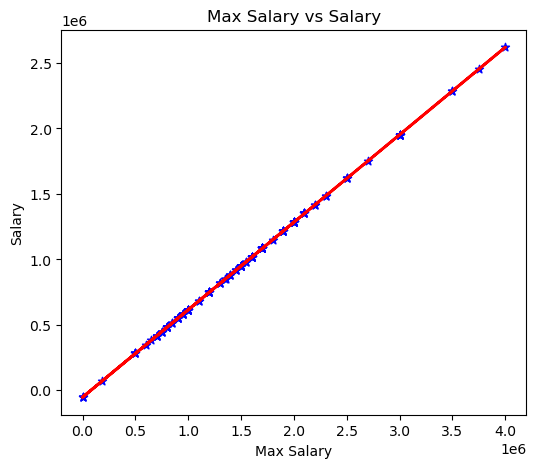

In [65]:
plt.figure(figsize=(6,5))
plt.scatter(data_scientists["Max Salary"],y_pred,c="blue",marker="*")
plt.plot(data_scientists["Max Salary"],y_pred,c="red",linewidth=2)
plt.xlabel("Max Salary")
plt.ylabel("Salary")
plt.title("Max Salary vs Salary")
plt.show()

In [66]:
# K-means
data_scientists.drop(columns=["Role","Companies","Location","Skills","Eligibility Criteria","Enrollment Type"],inplace=True)

In [67]:
data_scientists.columns

Index(['Experience', 'Company Size', 'Salary', 'Min Salary', 'Max Salary'], dtype='object')

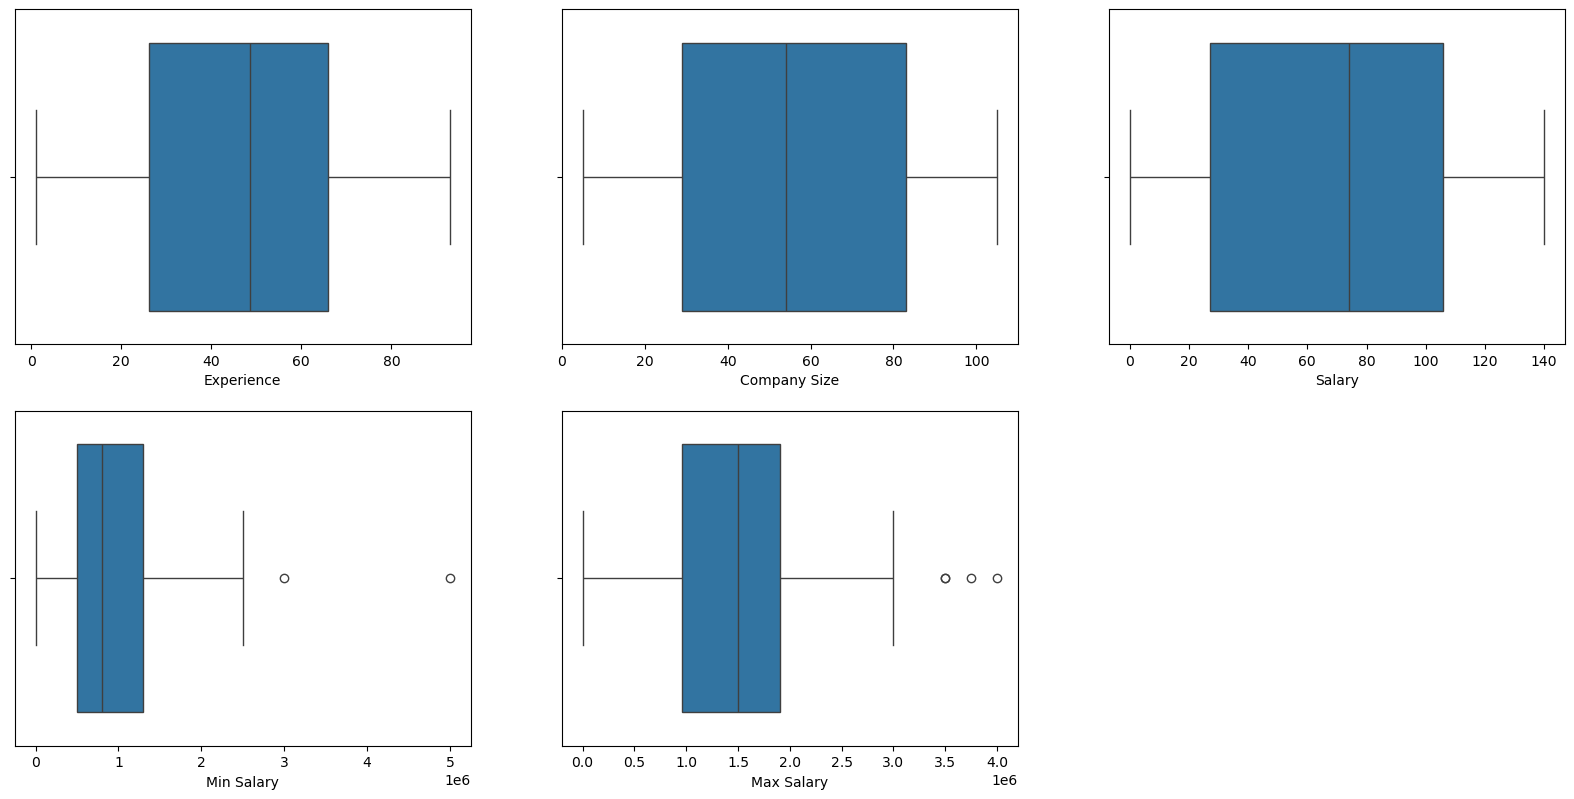

In [68]:
i=1
plt.figure(figsize=(20,20))
for j in data_scientists.columns:
  plt.subplot(4,3,i)
  sns.boxplot(data=data_scientists,x=j)
  i+=1

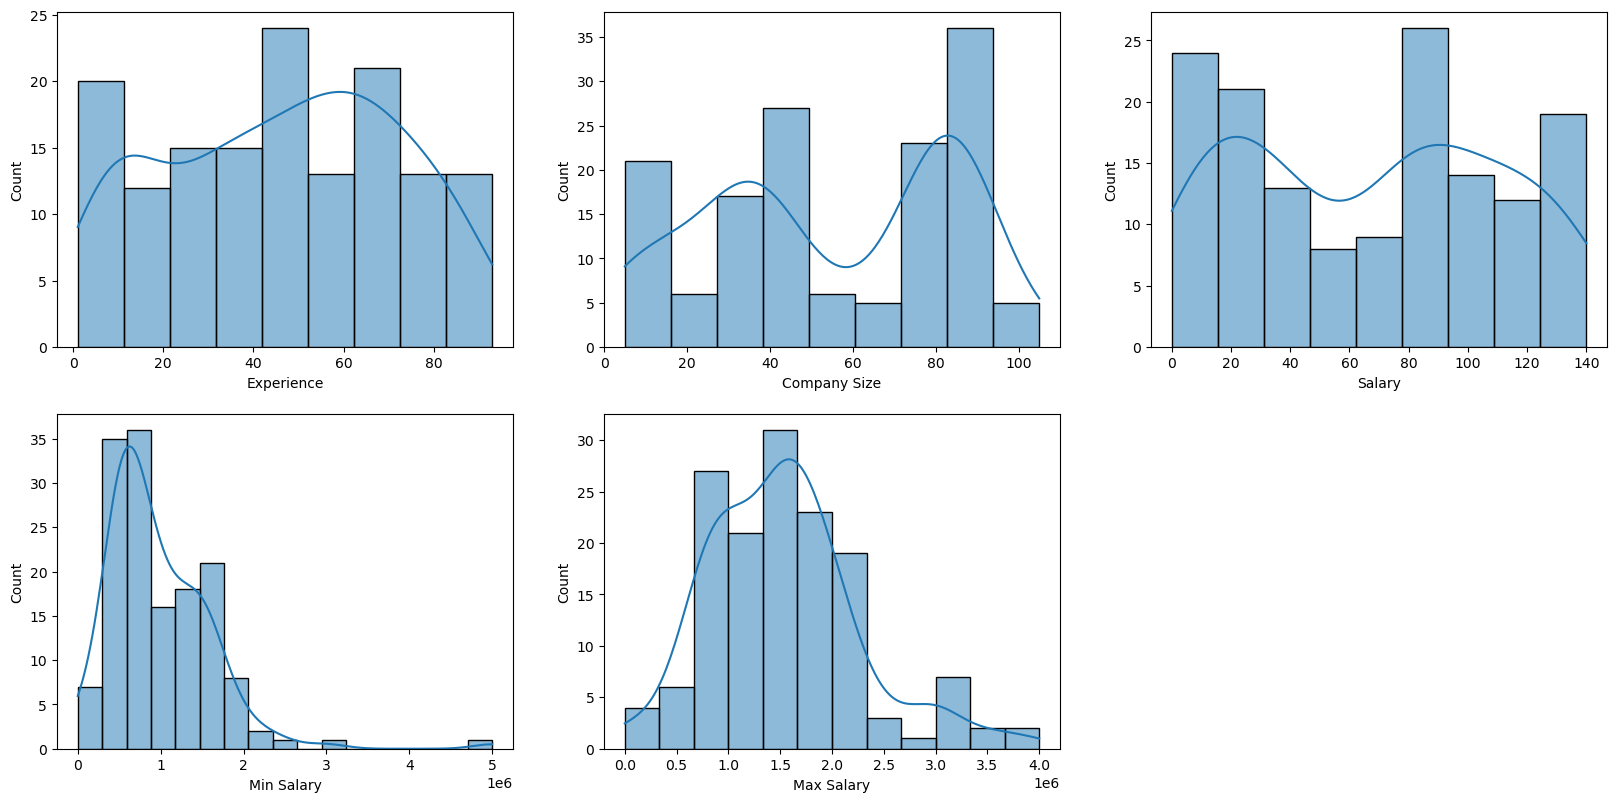

In [69]:
i=1
plt.figure(figsize=(20,20))
for j in data_scientists.columns:
  plt.subplot(4,3,i)
  sns.histplot(data=data_scientists,x=data_scientists[j],kde=True)
  i+=1

In [70]:
data_scientists.corr()

,Experience,Company Size,Salary,Min Salary,Max Salary
Experience,1.000000,-0.090102,0.042188,0.063735,0.044113
Company Size,-0.090102,1.000000,0.099386,0.053065,0.141546
Salary,0.042188,0.099386,1.000000,-0.323301,-0.314166
Min Salary,0.063735,0.053065,-0.323301,1.000000,0.780648
Max Salary,0.044113,0.141546,-0.314166,0.780648,1.000000


<Axes: >

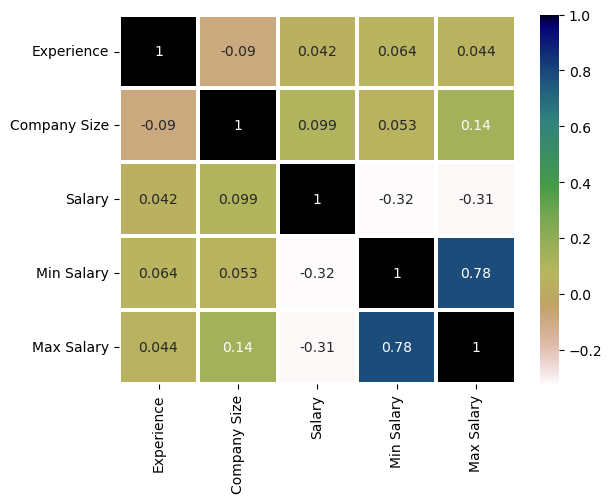

In [71]:
sns.heatmap(data_scientists.corr(),cmap="gist_earth_r",linewidths=1.5,annot=True)

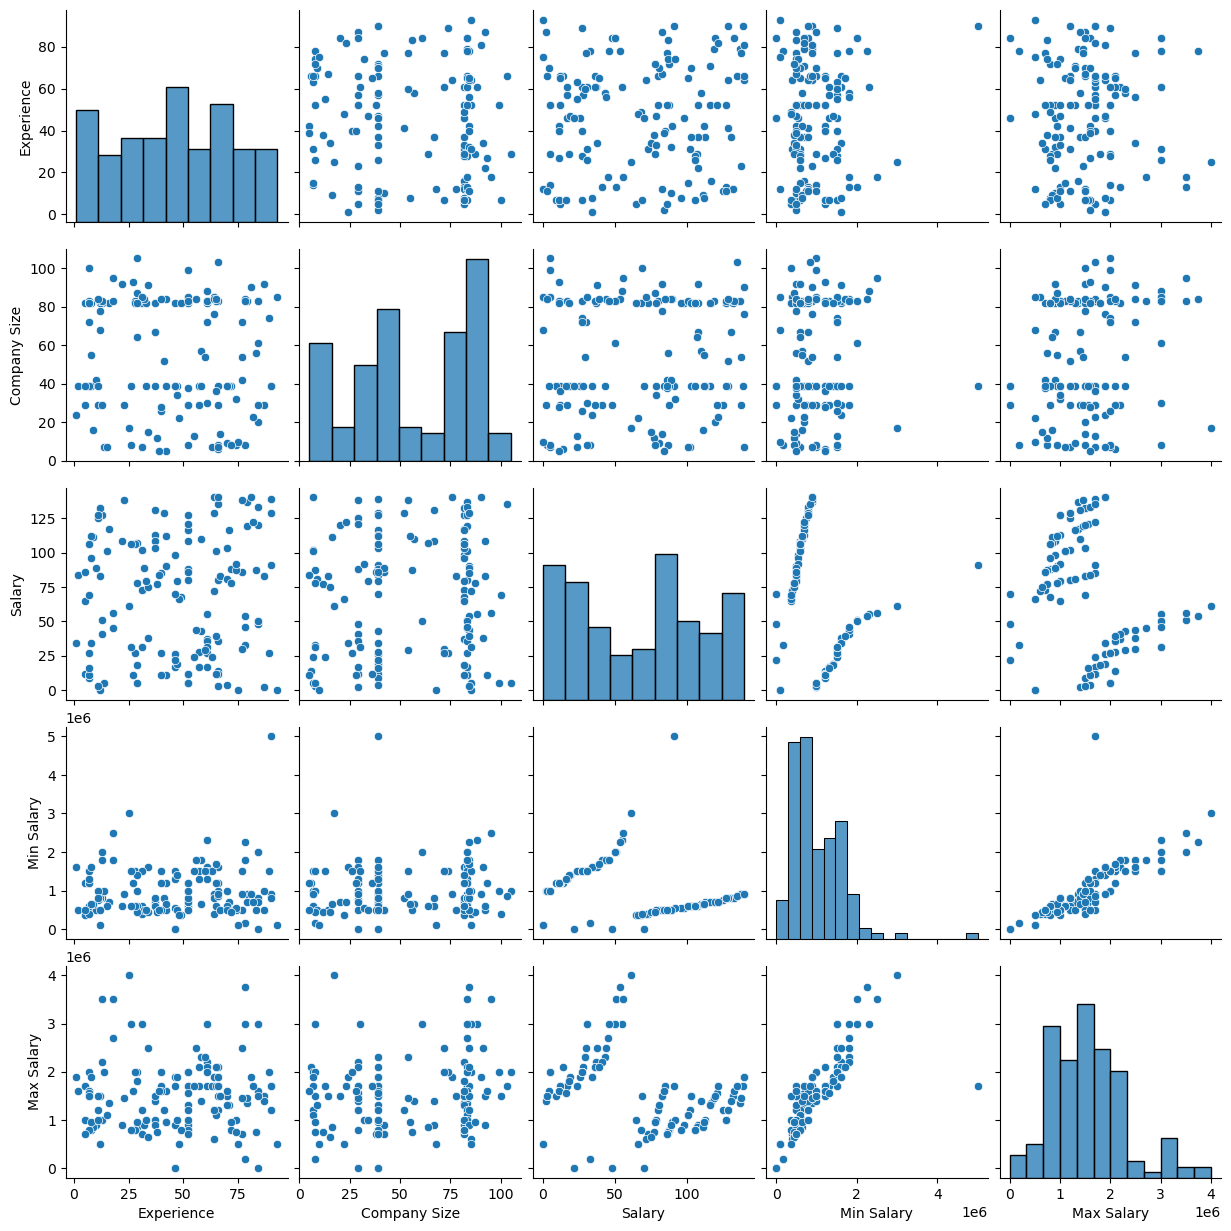

In [72]:
sns.pairplot(data_scientists)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_scientists)

In [74]:
scale_df=pd.DataFrame(df_scaled,columns=data_scientists.columns)
scale_df

,Experience,Company Size,Salary,Min Salary,Max Salary
0,-0.673370,1.718402,-1.431014,0.040785,0.655798
1,1.235980,-1.577820,-0.787522,-1.287739,-1.835312
2,1.703575,-0.524388,0.545425,6.367088,0.244044
3,-0.010943,-0.524388,-1.155231,0.515258,0.244044
4,-0.010943,-0.524388,-0.948395,0.831573,0.518546
...,...,...,...,...,...
141,0.222855,-0.558370,0.430516,-0.750003,-1.128468
142,-0.283707,-1.679765,0.384552,-0.750003,0.106793
143,-1.608562,-0.524388,0.430516,-0.750003,-1.128468
144,-1.374764,-0.524388,1.372772,-0.275530,-0.716715


In [75]:
from sklearn.metrics import silhouette_score

In [76]:
from sklearn.cluster import KMeans
wss=[]
for i in range (1,10):
  km=KMeans(n_clusters=i)
  km.fit(scale_df)
  wss.append(km.inertia_)

In [77]:
slh_score=[]
for i in range(2,10):
  km=KMeans(n_clusters=i)
  km.fit(data_scientists)
  slh_score.append(silhouette_score(scale_df,km.labels_))

Text(0, 0.5, 'wss')

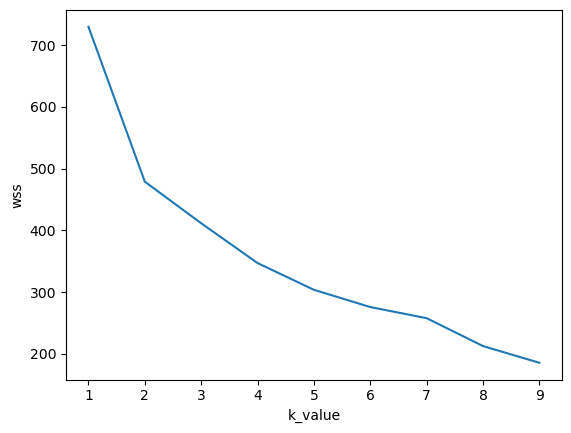

In [78]:
plt.plot(range(1,10),wss)
plt.xlabel("k_value")
plt.ylabel("wss")

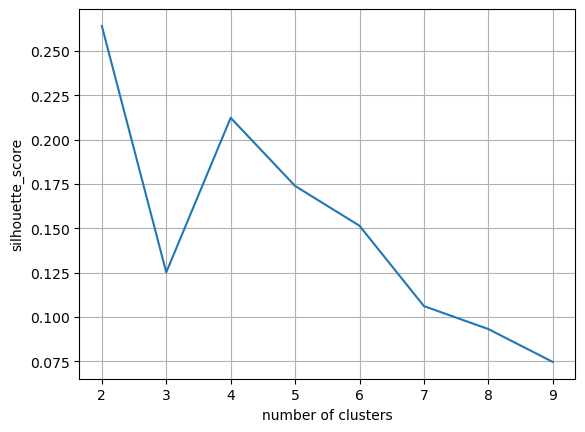

In [79]:
plt.plot(range(2,10),slh_score)
plt.xlabel("number of clusters")
plt.ylabel("silhouette_score")
plt.grid(True)

In [80]:
km1=KMeans(n_clusters=3)
km1.fit(scale_df)
y=km1.predict(scale_df)
data_scientists["Label"]=y

In [81]:
data_scientists.head()

,Experience,Company Size,Salary,Min Salary,Max Salary,Label
0,29,105,5,1000000,2000000,0
2,78,8,33,160000,185000,2
4,90,39,91,5000000,1700000,0
5,46,39,17,1300000,1700000,0
6,46,39,26,1500000,1900000,0


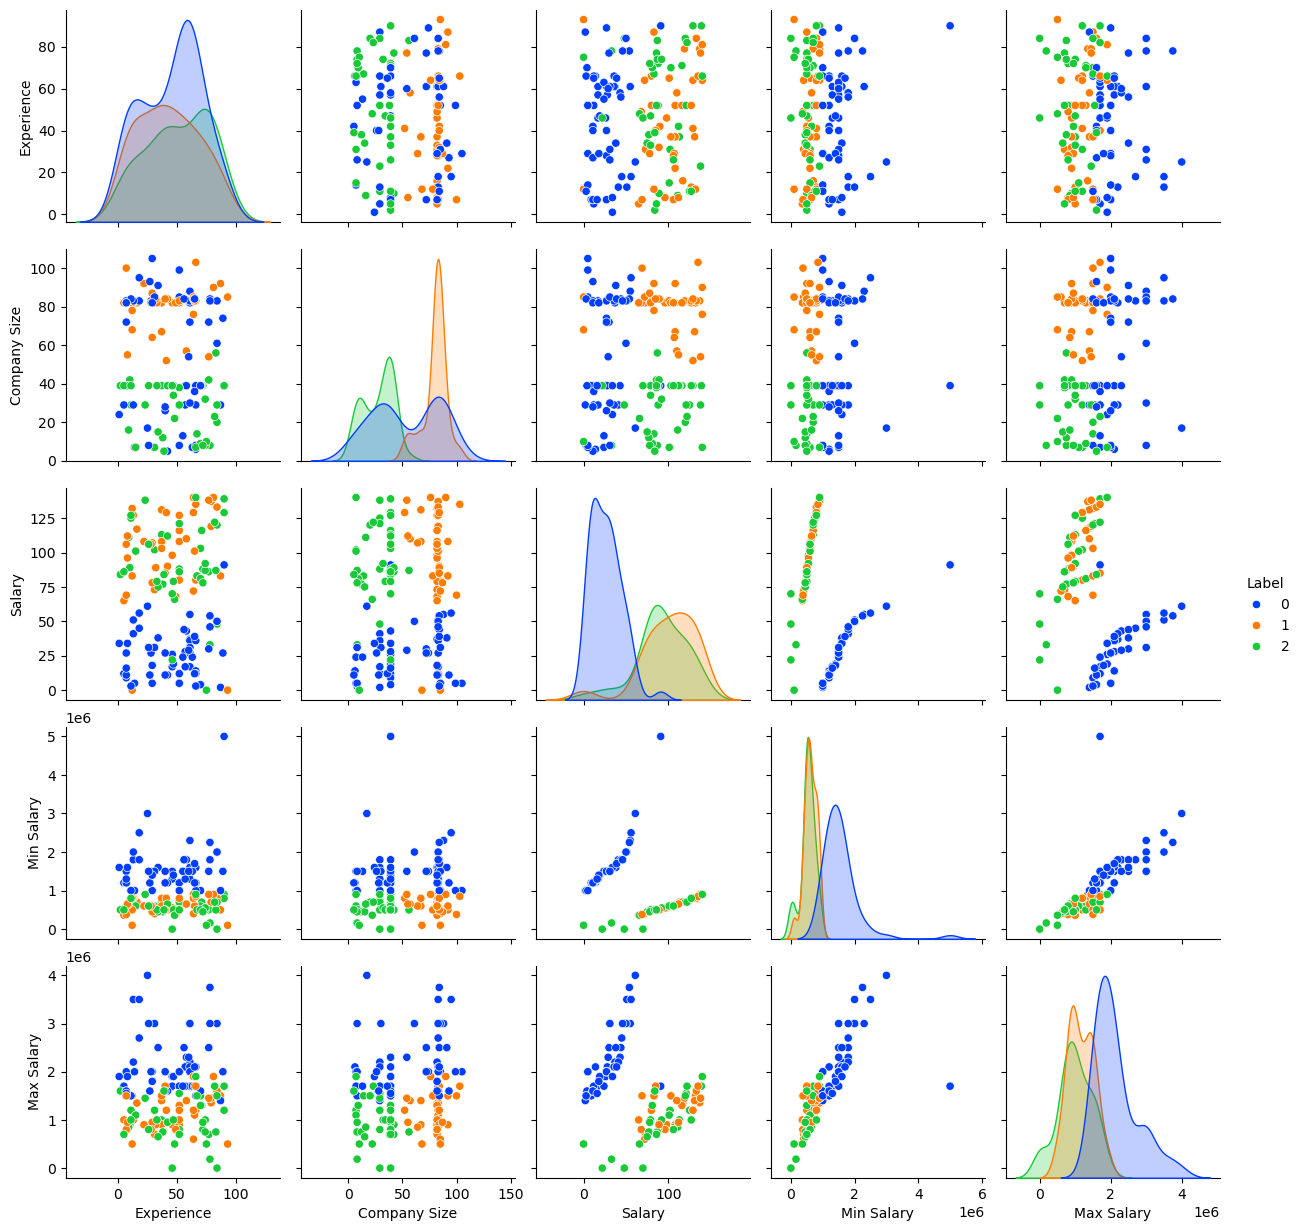

In [82]:
sns.pairplot(data_scientists,hue="Label",palette="bright")

In [83]:
#cordinates of centroids
center=km1.cluster_centers_
center

array([[-0.02180206, -0.01076379, -0.93972948,  0.88990987,  0.84929929],
       [-0.13846874,  0.86886027,  0.77263228, -0.58052252, -0.49508504],
       [ 0.18103781, -0.916421  ,  0.56896776, -0.70101247, -0.73228085]])

In [84]:
km_silihoute=silhouette_score(scale_df,km1.labels_)
km_silihoute

0.26971166725128115